# Analysis of cancer patients useing Haberman Dataset

In [1]:
# Importing impotrtant library.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Loadind haberman.csv Data to Dataframe.
haberman= pd.read_csv("haberman.csv")

In [2]:
# Number of data point in the dataframe.
print (haberman.shape)

(306, 4)


In [3]:
# Column name of the Dataset.
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
# how many data poits from each of the class.
haberman['status'].value_counts()
# this data set is not balance because the difference between data points in both the classes is very large.

1    225
2     81
Name: status, dtype: int64

# About haberman dataset

- this data set is about the cancer patients those who andergone through surgery between year of 1958 to 1969
- this data contains 4 attributs and 306 data points.
- the four attributs are :-
  1. age = Age of patients 
  2. year = In which year surery had been done.
  3. nodes = This is related to medical terminology , also known as Lymph node  is an ovoid or kidney-shaped organ of        thelymphatic system and the adaptive immune system. Lymph nodes are widely present throughout the body and are linked by the lymphatic vessels. in this  data set it is of range of 0 to 52 .
  4. status : '1' is for survial of more than 5 year after surery ,'2' is for survial of less than 5 year after surery .





# Objective
- To make analogy betwen attributes and do analysis of the data points by ploting different  types of plots and observe
  the plot and parametes like mean , median, std_deviation  and make a observation about status (class) of the patients .

#  2-D Scatter plot 

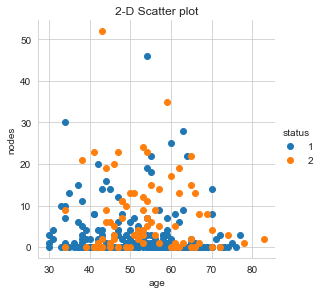

In [9]:

sns.set_style('whitegrid');
sns.FacetGrid(haberman, hue = 'status' , size = 4).map(plt.scatter , 'age', 'nodes').add_legend();
plt.title('2-D Scatter plot')
plt.show()

# Obervation :-  
- this is coloured scatter plot  and the blue colour is of status of '1' and most of the blue one have lower nodes
- chances to survive patient is very high is age of patient is less then '60' and nodes is less than '5 '
- but not much separation between status '1' and status '2' .


# pair_plot

C:\Users\anant\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


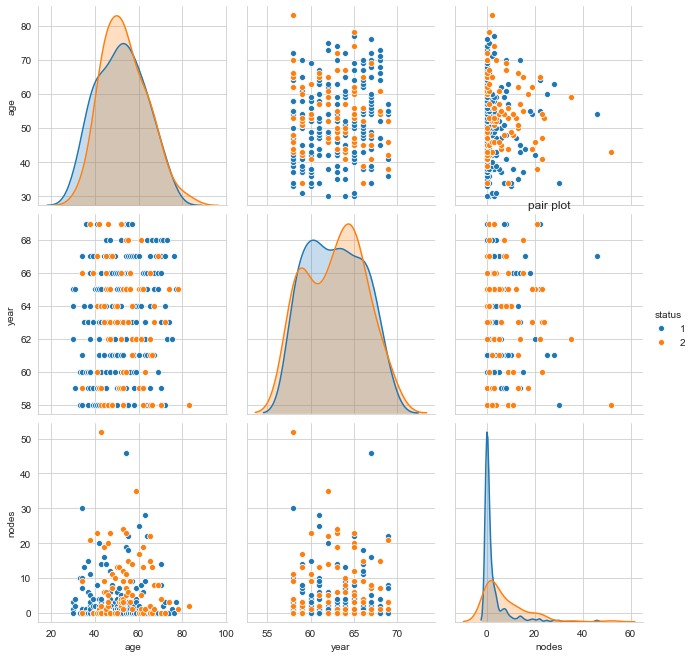

In [12]:
# there are nC2 plot exis .
# the diagonal plot is PDF
#Basically this plot is to find satter plot which is best to analize , and you you can also find which pair of data is best to 
#analize
plt.close();
sns.set_style('whitegrid');
sns.pairplot(haberman , hue = 'status' , size = 3);
plt.title('pair plot')

plt.show()

# observation :-
- There is no such good result except plot between 'age' and 'nodes' which analysis have been done previously.

# Histogram, PDF

C:\Users\anant\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


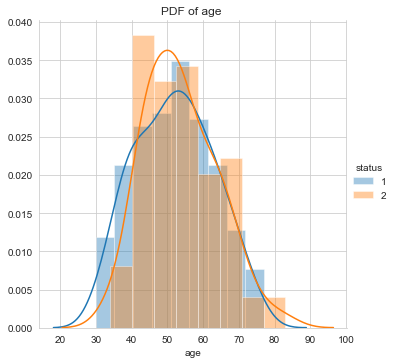

In [13]:
#Histogram and PDf with age
sns.FacetGrid(haberman , hue = "status", size = 5)\
     .map(sns.distplot , "age").add_legend();


plt.title('PDF of age ')


plt.show();

# observation :-
- although a large portion is overlap but we can observe that patiens with age less then '40' have more chances to survive.

C:\Users\anant\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


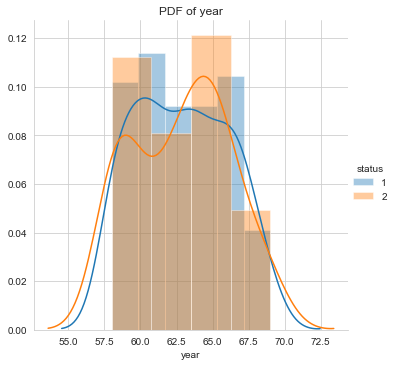

In [14]:
#
sns.FacetGrid(haberman , hue = "status", size = 5)\
     .map(sns.distplot , "year").add_legend();

plt.title('PDF of year')
plt.show();

C:\Users\anant\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


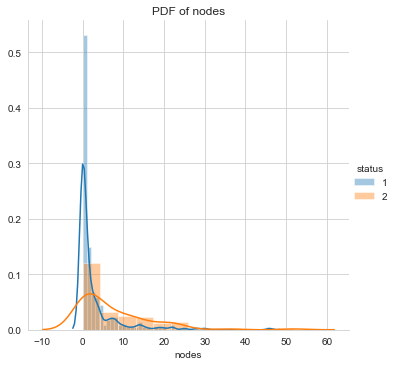

In [15]:
# with nodes
sns.FacetGrid(haberman , hue = "status", size = 5)\
     .map(sns.distplot , "nodes").add_legend();

plt.title('PDF of nodes')
plt.show();

# Obervation:-
- nodes of  value less than '5 '  have higher chances to survive.

# CDF

In [17]:
haberman_1 = haberman.loc[haberman["status"] == 1]; # store data with status '1' 
haberman_2 = haberman.loc[haberman["status"]==2]    # store data withe status '2'
#note :- haberman_1 = patient survive more than 5yr, haberman_2 = patients survive less than 5yr

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]


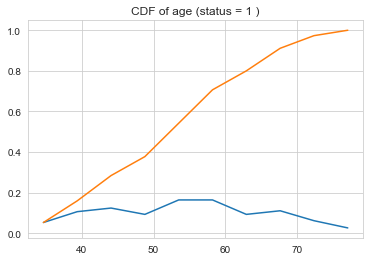

In [19]:

counts,bin_edges = np.histogram(haberman_1['age'],bins = 10,density = True)
pdf = counts/(sum(counts))
print(pdf)
cdf = np.cumsum(pdf)
plt.title('CDF of age (status = 1 )')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]


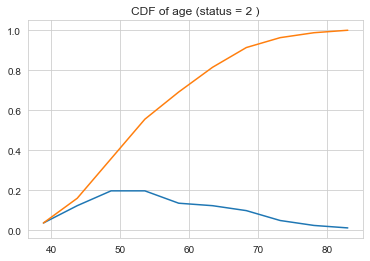

In [20]:

counts,bin_edges = np.histogram(haberman_2['age'],bins = 10,density = True)
pdf = counts/(sum(counts))
print(pdf)
cdf = np.cumsum(pdf)
plt.title('CDF of age (status = 2 )')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)



[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]


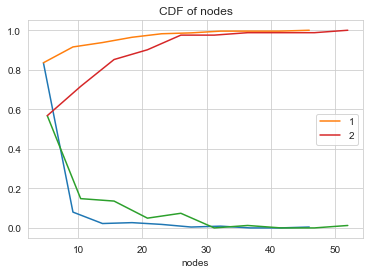

In [21]:
counts,bin_edges = np.histogram(haberman_1['nodes'],bins = 10,density = True)
pdf = counts/(sum(counts))
print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf , label=1)

counts,bin_edges = np.histogram(haberman_2['nodes'],bins = 10,density = True)
pdf = counts/(sum(counts))
print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf ,label = 2)
plt.xlabel("nodes")
plt.legend()
plt.title('CDF of nodes')
plt.show()


In [69]:
# Obsevation:-
# CDF  started with more then 80% that means if nodes value is less more chance to survive.
# if nodes value less then 5 then there is 90% chances to survive 

# Mean,and Std-dev

In [70]:
print("Means nodes:")
print(np.mean(haberman_1["nodes"]))
print(np.mean(haberman_2["nodes"]))

print("\nMean age \n:")
print(np.mean(haberman_1["age"]))
print(np.mean(haberman_2["age"]))



print("\nStd-dev of nodes\n:");
print(np.std(haberman_1["nodes"]))
print(np.std(haberman_2["nodes"]))

print("\nStd-dev of age:\n");
print(np.std(haberman_1["age"]))
print(np.std(haberman_2["age"]))



Means nodes:
2.7911111111111113
7.45679012345679

Mean age 
:
52.01777777777778
53.67901234567901

Std-dev of nodes
:
5.857258449412131
9.128776076761632

Std-dev of age:

10.98765547510051
10.10418219303131


# Obsevation:-
-  mean node value of patients who survive is 2.7 which is less and we have this in pervious analysis.
-  from mean age we con not be able to any conclusion 
-  spred of nodes of patientas who survive is less as compere to patients who had not survive.


# Median, Percentile, Quantile, IQR, MAD

In [75]:
print("\nMedians:")
print(np.median(haberman_1["nodes"]))
print(np.median(haberman_2["nodes"]))



print("\nQuantiles:")
print(np.percentile(haberman["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_1["nodes"],90))
print(np.percentile(haberman_2["nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["nodes"]))
print(robust.mad(haberman_2["nodes"]))




Medians:
0.0
4.0

Quantiles:
[0. 0. 1. 4.]
[0. 0. 1. 4.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# Box plot 

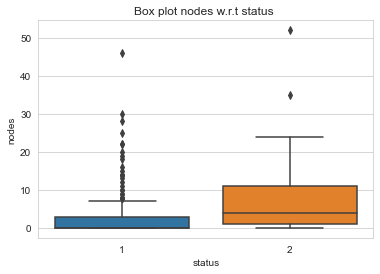

In [27]:
sns.boxplot(x='status',y='nodes', data=haberman )
plt.title('Box plot nodes w.r.t status ')
plt.show()

# Observation:-
- from box plot also we can say that to most probably if nodes< "6" is to susrvive .
- if node value is more then '7' patient mosst probabily to died.


# Violin plots

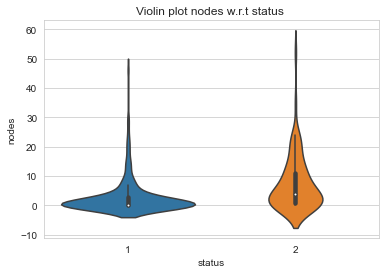

In [28]:
# with nodes
sns.violinplot(x="status", y="nodes", data=haberman, size=10)
plt.title('Violin plot nodes w.r.t status ')
plt.show()

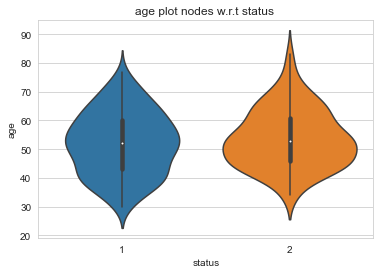

In [29]:
# with age
sns.violinplot(x="status", y="age", data=haberman, size=10)
plt.title('age plot nodes w.r.t status ')
plt.show()

# Obervation :-
- by looking at  both plot with 'nodes' and 'age' chances of survive a patients is high if age is between 40 to 60 
- but at chances of die is almost same withe the age 
- but in the plot with the node plot "1" is very much concentrated at "0" so if node value is less than chances of survive 
  is high

# summary

- In scatter plot numerous number of poits are closest to zero node axis and  in nodes vs age plot  so chances of survive is 
high three
-  Mean  of node value who  survived is  is 2.7 and mean who died is 7.4 .
-  Median of node value who servived is  '0' and who died is '4'
- By looking at PDf there is high overlapping  in every plot still be con con conclude that age is less than 40 and node 
value less than 5 then high chances of surivie.
- CDF  started with more then 80% that means if nodes value is less more chance to survive.
if nodes value less then 5 then there is 90% chances to survive .
- from box plot also we can say that to most probably if nodes< "6" is to susrvive .
if node value is more then '7' patient mosst probabily to died. 
- In the plot with the node is very much concentrated at "0" so if node value is less than chances of survive 
is high